In [63]:
import pandas as pd
import prediction_of_H_indicator_with_subCatchmentData as prediction
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
def get_features_imp_for_a_site_and_all_subcatchs(site_number, nb_clusters=1, approx=0, chronicle=0, permeability=27.32):

    imp_features_df_all = pd.DataFrame(columns=["Approx",
                "Chronicle",
                "Test Site",
                "SubCatchment",
                "Feature",
                "ImportanceValue",
                "ImportanceRank"])
    for subcatch_number in range(1, 40):
        MYDIR = (
            "output"
            + "/"
            + "Approx"
            + str(approx)
            + "/Chronicle"
            + str(chronicle)
            + "/SiteTest"
            + str(site_number)
        )
        file = (MYDIR
        + "/"
        + "Feature_Importance"
        + "_Site"
        + str(site_number)
        + "_SubCatch"
        + str(subcatch_number)
        +"_Chronicle"
        + str(chronicle)
        + "_Approx"
        + str(approx)
        + "_K"
        + str(permeability)
        + "_Slope_Elevation_LC_SAR_Area_HV" #_CV_HV
        + "Clusters" + str(nb_clusters) + "_clean.csv")
        try:
            imp_sub = pd.read_csv(file, sep=";")
            imp_features_df_all = pd.concat([imp_features_df_all, imp_sub])
        except:
            continue
    #print(imp_features_df_all)
    
    out_file =("Feature_Importance" + "_Site"
        + str(site_number)
        + "_All_SubCatchs"
        +"_Chronicle"
        + str(chronicle)
        + "_Approx"
        + str(approx)
        + "_K"
        + str(permeability)
        + "_Slope_Elevation_LC_SAR_Area_HV" #_CV_HV
        + "Clusters" + str(nb_clusters) + "_clean.csv")
    imp_features_df_all.to_csv(MYDIR + "/" + out_file, sep=";", index=False)
    return imp_features_df_all

In [73]:
for site in range(1, 41):
    try:
        get_features_imp_for_a_site_and_all_subcatchs(site)
    except:
        continue
print("Finished.")

Finished.


In [69]:


def concat_imp_for_all_sites_all_subcatchs(nb_clusters=1, approx=0, chronicle=0, permeability=27.32):
    imp_features_df_all_sites = pd.DataFrame(columns=["Approx",
                "Chronicle",
                "Test Site",
                "SubCatchment",
                "Feature",
                "ImportanceValue",
                "ImportanceRank"])
    
    
    for site_number in range(1,41):
    
        MYDIR = (
            "output"
            + "/"
            + "Approx"
            + str(approx)
            + "/Chronicle"
            + str(chronicle)
            + "/SiteTest"
            + str(site_number)
        )
        file = ("Feature_Importance" + "_Site"
        + str(site_number)
        + "_All_SubCatchs"
        +"_Chronicle"
        + str(chronicle)
        + "_Approx"
        + str(approx)
        + "_K"
        + str(permeability)
        + "_Slope_Elevation_LC_SAR_Area_HV" #_CV_HV
        + "Clusters" + str(nb_clusters) + "_clean.csv")
        try:
            imp_for_a_site = pd.read_csv(MYDIR + "/" + file, sep=";")
            imp_features_df_all_sites = pd.concat([imp_features_df_all_sites,imp_for_a_site])
        except:
            continue
    out_file = ("Feature_Importance" + "_All_Site"
        + "_All_SubCatchs"
        +"_Chronicle"
        + str(chronicle)
        + "_Approx"
        + str(approx)
        + "_K"
        + str(permeability)
        + "_Slope_Elevation_LC_SAR_Area_HV"
        + "Clusters" + str(nb_clusters) + "_clean.csv"
    )
    imp_features_df_all_sites.to_csv("output" + "/" + out_file, sep=";", index=False)
    print("Concatenation finished.")
    return imp_features_df_all_sites

In [74]:
imp_features_df_all_sites = concat_imp_for_all_sites_all_subcatchs()

Concatenation finished.


In [75]:
imp_features_df_all_sites

,Approx,Chronicle,Test Site,SubCatchment,Feature,ImportanceValue,ImportanceRank
0,0,0,1,1,Elevation,0.286012,1
1,0,0,1,1,Rate,0.259693,2
2,0,0,1,1,LC,0.169171,3
3,0,0,1,1,SAR,0.082460,4
4,0,0,1,1,Area,0.081060,5
...,...,...,...,...,...,...,...
51,0,0,25,8,LC,0.172590,3
52,0,0,25,8,SAR,0.087187,4
53,0,0,25,8,Area,0.079414,5
54,0,0,25,8,Slope,0.065877,6


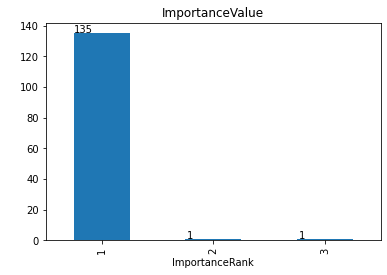

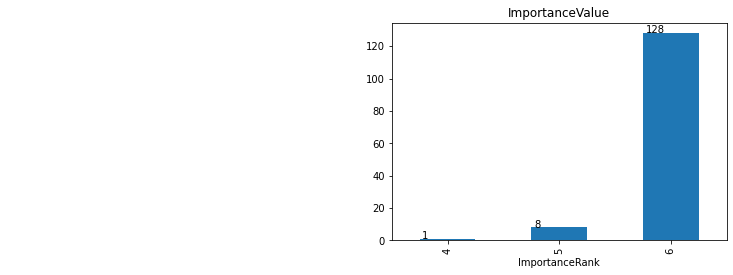

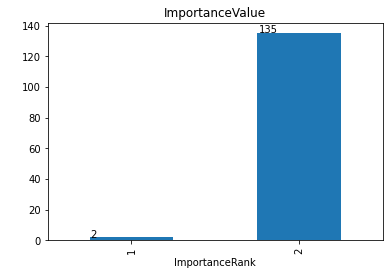

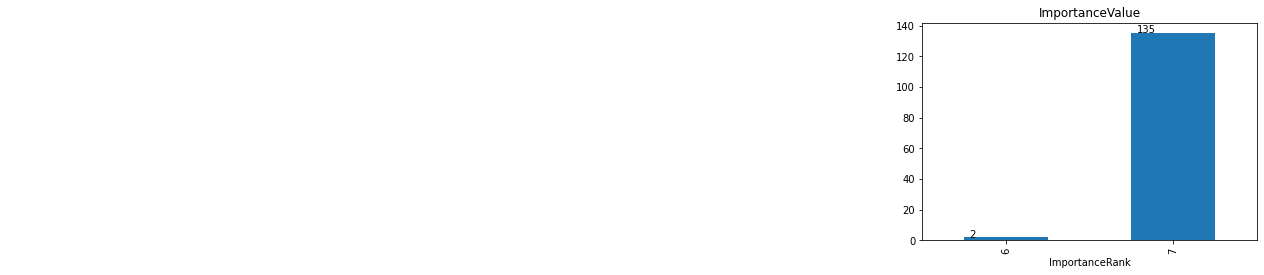

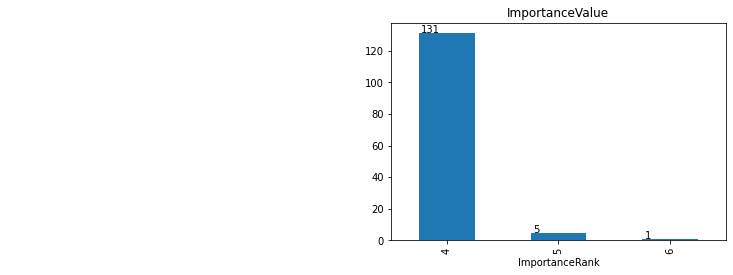

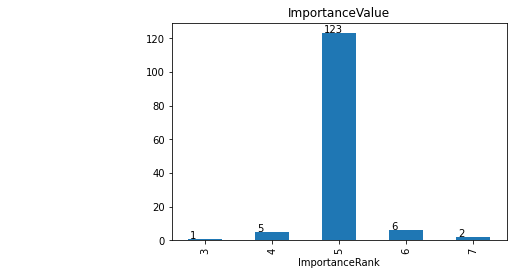

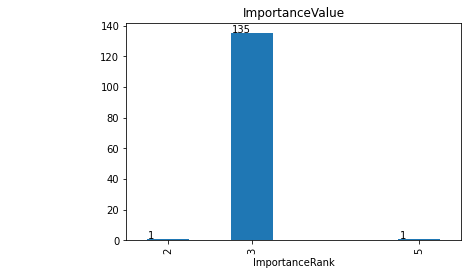

In [76]:
for feature in ["Elevation", "Slope", "Rate", "HV", "SAR", "Area", "LC"]: #"CV",
    df_feature = imp_features_df_all_sites.loc[imp_features_df_all_sites["Feature"] == feature]
    df_feature.hist()
    plt.savefig("output/" + "Histo_ImpValue_No_CV_Feature_" + str(feature) + ".jpg")
    d = df_feature.groupby('ImportanceRank').count()["Feature"]
    ax = d.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.savefig("output/" + "Histo_ImpRank_No_CV_Feature_" + str(feature) + ".jpg")

In [8]:
df_feature

,Approx,Chronicle,Test Site,SubCatchment,Feature,ImportanceValue,ImportanceRank
0,0,0,1,1,Elevation,0.280166,1
8,0,0,1,3,Elevation,0.280720,1
16,0,0,1,4,Elevation,0.275504,1
24,0,0,1,5,Elevation,0.280081,1
32,0,0,1,6,Elevation,0.278443,1
...,...,...,...,...,...,...,...
16,0,0,39,4,Elevation,0.278562,1
24,0,0,39,5,Elevation,0.278337,1
32,0,0,39,7,Elevation,0.278231,1
40,0,0,39,8,Elevation,0.278535,1


array([[<AxesSubplot:title={'center':'ImportanceValue'}>]], dtype=object)

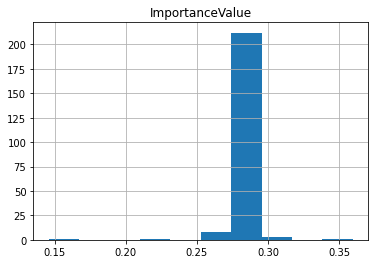

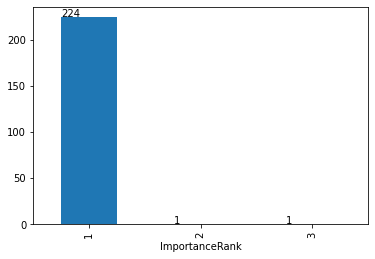

In [37]:
d = df_feature.groupby('ImportanceRank').count()["Feature"]
ax = d.plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [18]:
print(df_feature["ImportanceRank"])

0     1
8     1
16    1
24    1
32    1
     ..
16    1
24    1
32    1
40    1
48    1
Name: ImportanceRank, Length: 226, dtype: object


In [19]:
df_feature.describe()

,ImportanceValue
count,226.000000
mean,0.279481
std,0.011596
min,0.145800
25%,0.278210
50%,0.279688
75%,0.281207
max,0.359579


In [33]:
dt = df_feature.groupby('ImportanceRank').count()

In [43]:
def concat_imp_for_all_sites_byRates(nb_clusters=1, approx=0, chronicle=0, permeability=27.32):
    imp_features_df_all_sites = pd.DataFrame(columns=["Approx",
                "Chronicle",
                "Test Site",
                "Rate",
                "Feature",
                "ImportanceValue",
                "ImportanceRank"])
    
    
    for site_number in range(1,41):
        for rate in [2, 7, 15, 21, 30, 45, 50, 60, 75, 90, 100, 150, 182, 200, 250, 300, 330, 350, 365, 550, 640, 730, 1000, 1500, 2000, 2250, 3000, 3182, 3652]:
    
            MYDIR = (
            "output"
            + "/"
            + "Approx"
            + str(approx)
            + "/Chronicle"
            + str(chronicle)
            + "/SiteTest"
            + str(site_number)
            )
            file = ("Feature_Importance"
            + "_Site"
            + str(site_number)
            + "_Rate"
            + str(rate)
            +"_Chronicle"
            + str(chronicle)
            + "_Approx"
            + str(approx)
            + "_K"
            + str(permeability)
            + "_Slope_Elevation_LC_SAR_Area_CV_HV"
            + "Clusters" + str(nb_clusters) + "byRates" +".csv")
            try:
                imp_for_a_site = pd.read_csv(MYDIR + "/" + file, sep=";")
                imp_features_df_all_sites = pd.concat([imp_features_df_all_sites,imp_for_a_site])
            except:
                continue
    out_file = ("Feature_Importance" + "_All_Sites"
        + "_All_Rates"
        +"_Chronicle"
        + str(chronicle)
        + "_Approx"
        + str(approx)
        + "_K"
        + str(permeability)
        + "_Slope_Elevation_LC_SAR_Area_CV_HV"
        + "Clusters" + str(nb_clusters) + "_byRates.csv"
    )
    imp_features_df_all_sites.to_csv("output" + "/" + out_file, sep=";", index=False)
    print("Concatenation finished.")
    return imp_features_df_all_sites

In [61]:
imp_features_df_all_sites_byrates = concat_imp_for_all_sites_byRates()
print(imp_features_df_all_sites_byrates)

Concatenation finished.
   Approx Chronicle Test Site Rate Feature  ImportanceValue ImportanceRank
0       0         0         1    2      HV         0.198031              1
1       0         0         1    2   Slope         0.177181              2
2       0         0         1    2      LC         0.164327              3
3       0         0         1    2     SAR         0.156058              4
4       0         0         1    2    Area         0.144638              5
..    ...       ...       ...  ...     ...              ...            ...
3       0         0        35   75     SAR         0.146325              4
4       0         0        35   75      HV         0.118066              5
5       0         0        35   75    Area         0.093014              6
6       0         0        35   75      CV         0.079013              7
7       0         0        35   75    Rate         0.000000              8

[4392 rows x 7 columns]


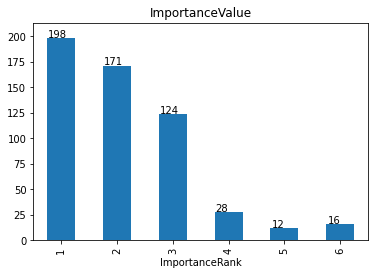

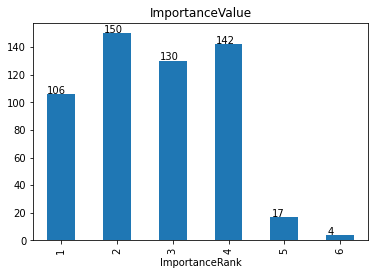

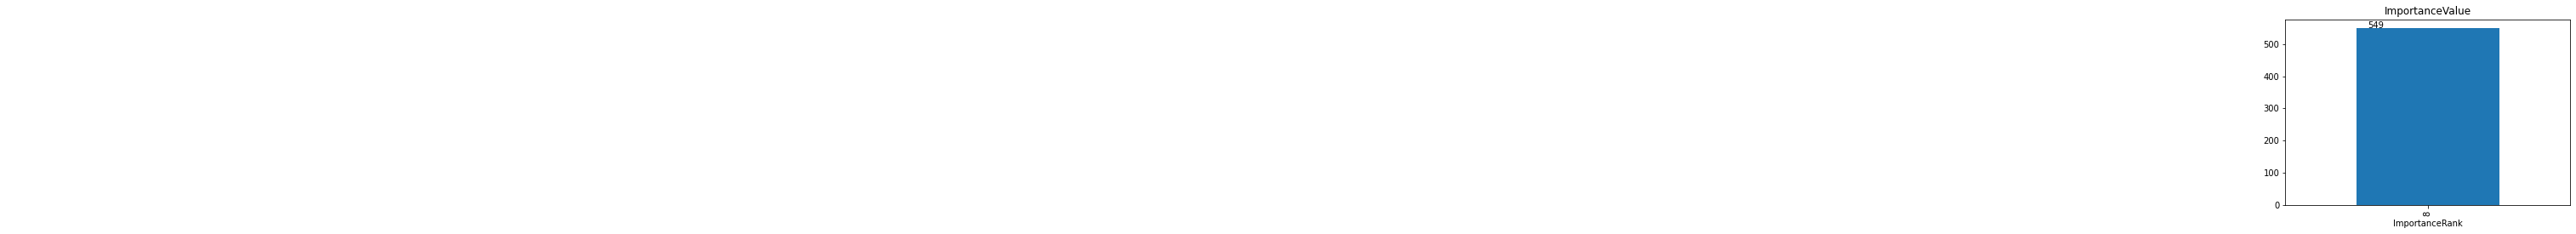

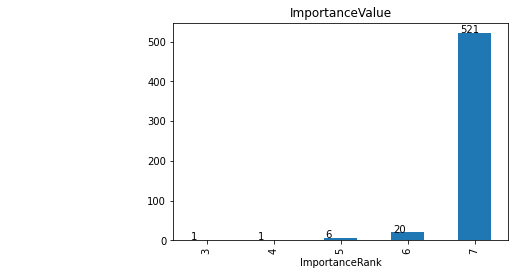

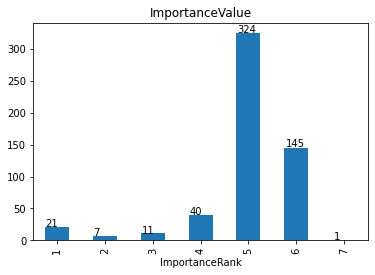

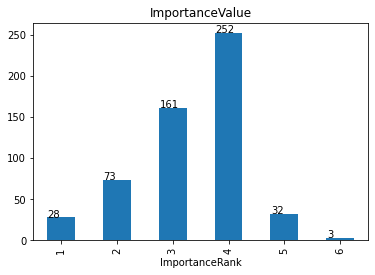

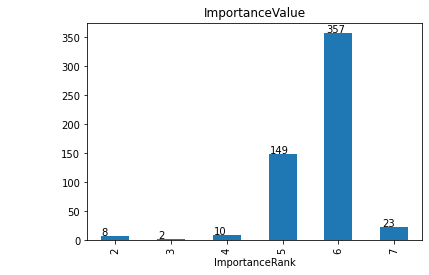

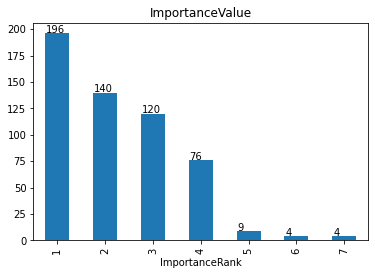

In [62]:
for feature in ["Elevation", "Slope", "Rate", "CV", "HV", "SAR", "Area", "LC"]:
    df_feature = imp_features_df_all_sites_byrates.loc[imp_features_df_all_sites_byrates["Feature"] == feature]
    df_feature.hist()
    plt.savefig("output/" + "Histo_ImpValue_Feature_" + str(feature) + "_byRates.jpg")
    d = df_feature.groupby('ImportanceRank').count()["Feature"]
    ax = d.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.savefig("output/" + "Histo_ImpRank_Feature_" + str(feature) + "_byRates.jpg")

## Summary

By Subcatch

1- Elevation
2- Rate
3- LC
4- SAR
5- Area
6- Slope
7- HV
8- CV

1- Elevation
2- Rate
3- LC
4- SAR
5- Area
6- Slope
7- HV

By Rates

1- LC
2- Elevation
3- Slope
4- SAR
5- HV
6- Area
7- CV
8- Rate